In [26]:
%cd /home/rob/data/OpenDataPortalDresden/csv/

/home/rob/data/OpenDataPortalDresden/csv


In [27]:
%ls steuerstatistik_dresden_quartale_md1.csv

steuerstatistik_dresden_quartale_md1.csv


In [28]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Import Data

In [29]:
df = pd.read_csv('./steuerstatistik_dresden_quartale_md1.csv',sep=';')

# Einzelne Spalten anzeigen

In [30]:
years = df['Jahr']
tax   = df['Grundsteuer A und B']
#tax oder years ausgeben ..

# Ganze Tabelle anzeigen

In [31]:
df.head()

Jahr     Quartal  Steuereinnahmen (netto)  Steuereinnahmen (brutto)  \
0  1991  1. Quartal                     4122                       934   
1  1991  2. Quartal                     8377                      4666   
2  1991  3. Quartal                     4962                      4962   
3  1991  4. Quartal                    33760                     16842   
4  1992  1. Quartal                    12473                     12473   

   Grundsteuer A und B  Gewerbesteuer (brutto)  Sonstige Gemeindesteuern  \
0                  934                       0                        60   
1                 4636                      30                        47   
2                  824                    4138                        60   
3                 1052                   15790                        35   
4                 2615                    9858                       138   

   Spielautomatensteuer  Hundesteuer  Zweitwohnungssteuer  \
0                     0            0                    0   
1                     0            0                    0   
2                     0            0                    0   
3                     0            0                    0   
4                     0            0                    0   

   Beherbergungssteuer  Gemeindeanteil an der Einkommenssteuer  \
0                    0                                    3188   
1                    0                                    3711   
2                    0                                       0   
3                    0                                   16918   
4                    0                                       0   

   Gewerbesteuerumlage  Gemeindeanteil Umsatzsteuer  
0                    0                            0  
1                    0                            0  
2                    0                            0  
3                    0                            0  
4                    0                            0

# To sum up, get a less columns

In [48]:
df.loc[:,['Jahr','Quartal','Steuereinnahmen (netto)']].head(5)

Jahr     Quartal  Steuereinnahmen (netto)
0  1991  1. Quartal                     4122
1  1991  2. Quartal                     8377
2  1991  3. Quartal                     4962
3  1991  4. Quartal                    33760
4  1992  1. Quartal                    12473

# Sum up each group

In [54]:
df.loc[:,['Jahr','Steuereinnahmen (netto)']].groupby(['Jahr']).sum().tail(5)

Steuereinnahmen (netto)
Jahr                         
2014                   444032
2015                   462857
2016                   526787
2017                   637082
2018                   619476

# Print graph with all values

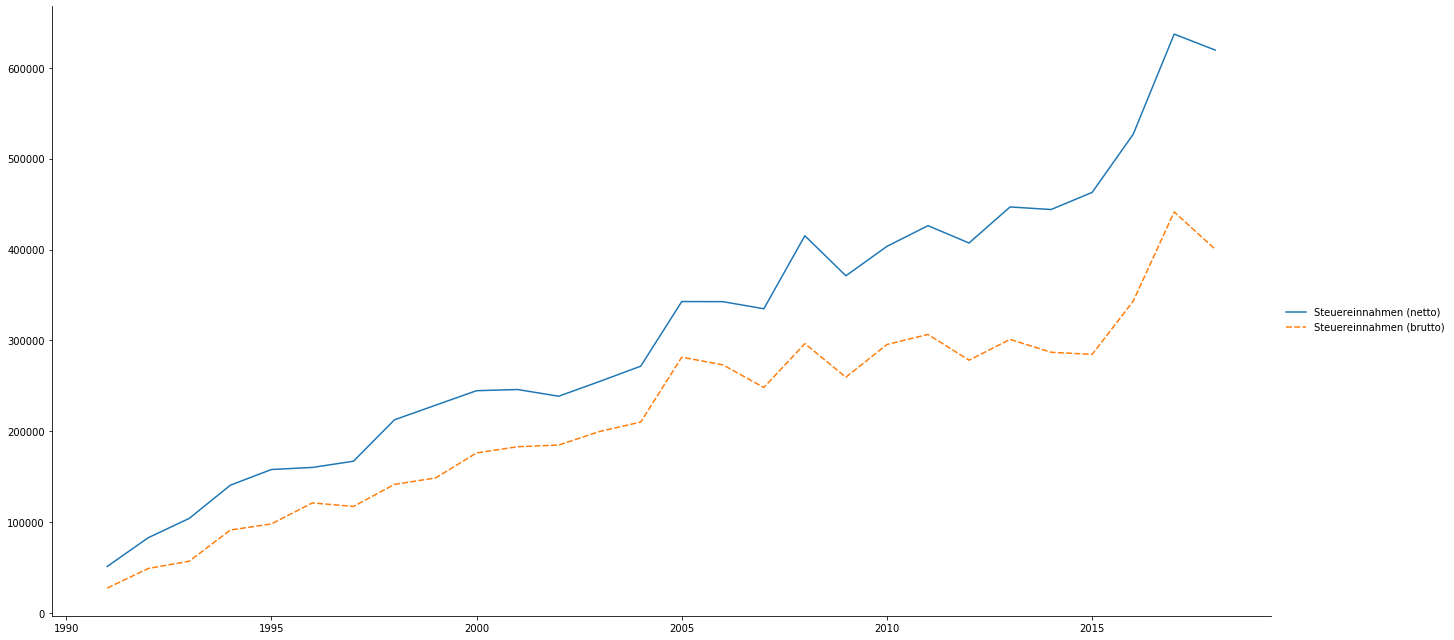

In [88]:
#select columns und sum the number-column 
tax_net = df.loc[:,['Jahr','Steuereinnahmen (netto)']].groupby(['Jahr']).sum()
tax_gross = df.loc[:,['Jahr','Steuereinnahmen (brutto)']].groupby(['Jahr']).sum()

# merge together both data sets
tax = tax_net
tax['Steuereinnahmen (brutto)'] = tax_gross['Steuereinnahmen (brutto)']

# spit it out
ax = sns.relplot(data=tax, height=9, aspect=2, kind="line")

# add one more data column

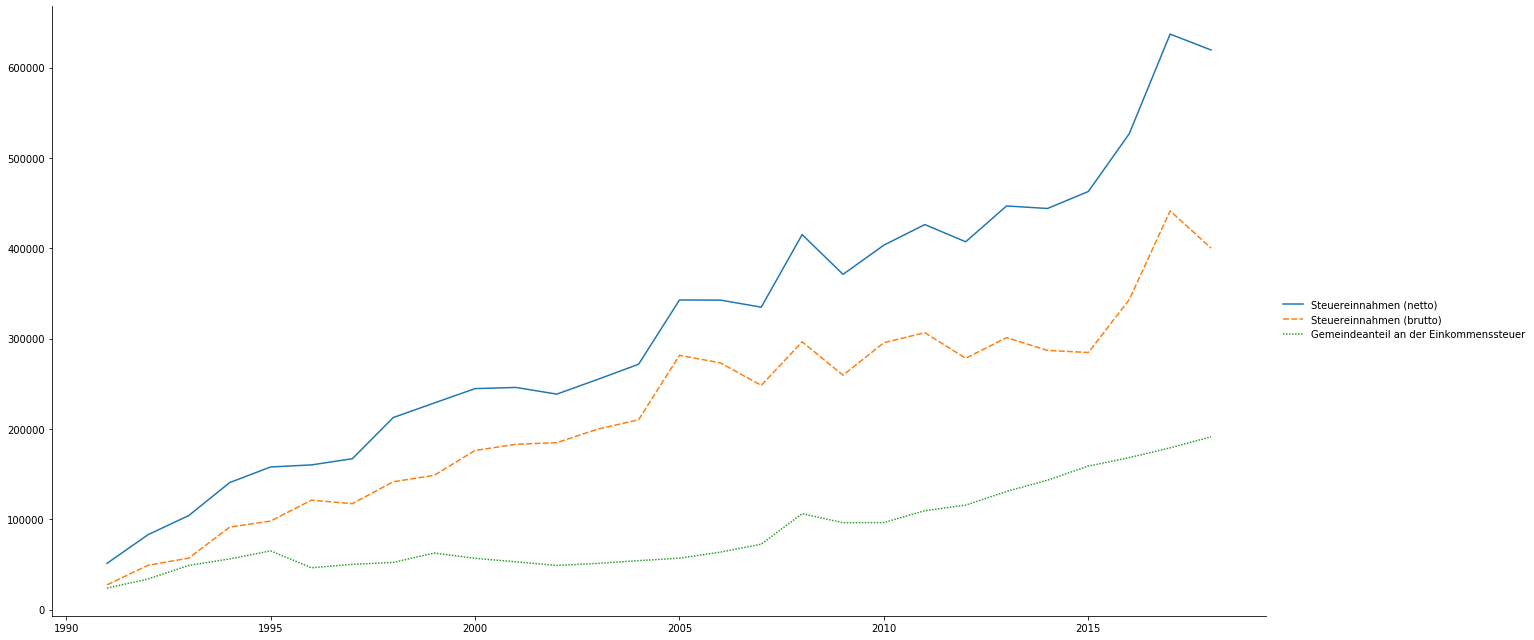

In [92]:
tax_municipality = df.loc[:,['Jahr','Gemeindeanteil an der Einkommenssteuer']].groupby(['Jahr']).sum()
tax['Gemeindeanteil an der Einkommenssteuer'] = tax_municipality

# spit it out
ax = sns.relplot(data=tax, height=9, aspect=2, kind="line")

# add even two more interesting columns

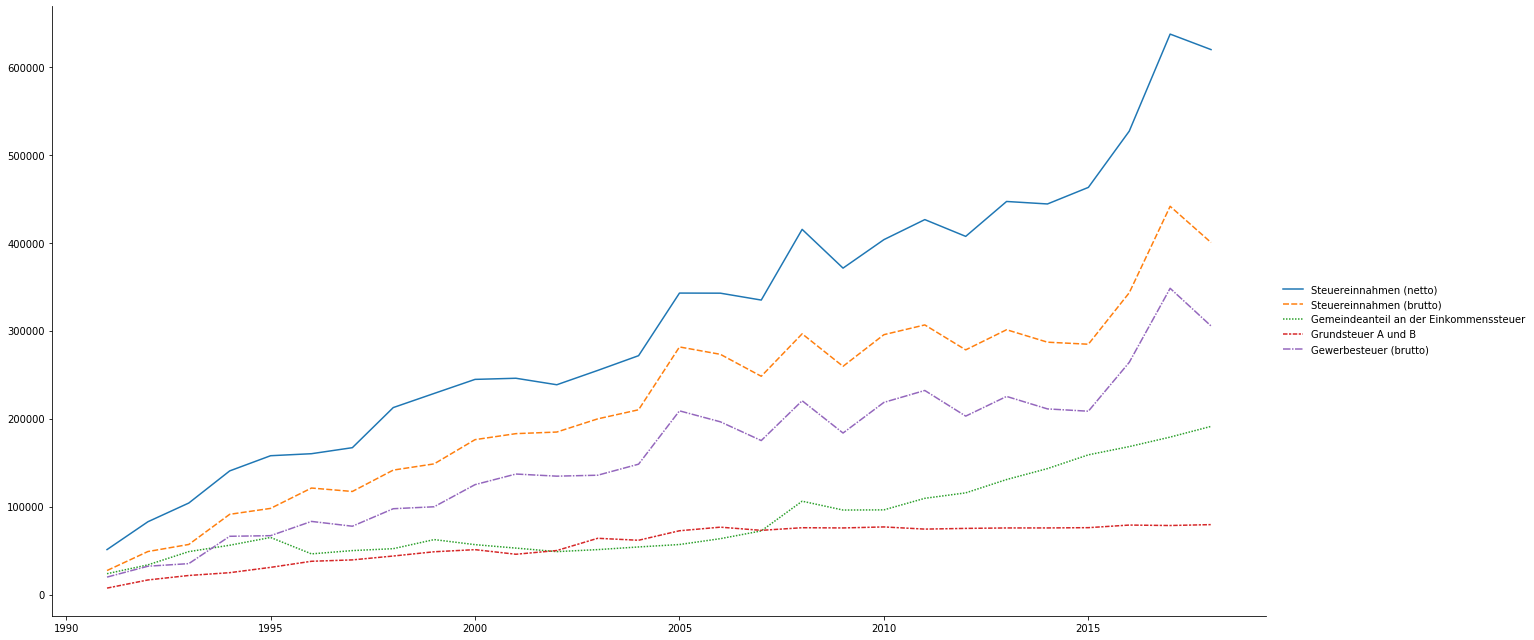

In [94]:
tax_property = df.loc[:,['Jahr','Grundsteuer A und B']].groupby(['Jahr']).sum()
tax_trade_gross = df.loc[:,['Jahr','Gewerbesteuer (brutto)']].groupby(['Jahr']).sum()

#even merge these two in our tax data set
tax['Grundsteuer A und B'] = tax_property
tax['Gewerbesteuer (brutto)'] = tax_trade_gross

# spit it out
ax = sns.relplot(data=tax, height=9, aspect=2, kind="line")
